<a href="https://colab.research.google.com/github/Effective-Quadratures/EQ-live/blob/master/EQ-live/Prototyping/Quadrature/Quadrature_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install equadratures # for standard pip install
  #!pip install git+https://github.com/Effective-Quadratures/Effective-Quadratures.git@master # for specific branch

import numpy as np                                                                                                                                                                                      
import matplotlib.pyplot as plt
from equadratures import *

     |████████████████████████████████| 102kB 2.2MB/s 


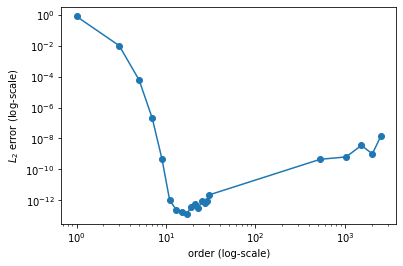

In [4]:
def fun(x):
    return np.sin(x)

MAX_VALUE = 3000
xgrid = np.linspace(-1, 1, 500).reshape(500, 1)
fgrid = evaluate_model(xgrid, fun)

error_store = []
error_store2 = []
order_store = []

for i in range(1, 30, 2):
    p = Parameter(distribution='uniform', lower=-1., upper=1., order=i)
    b = Basis('univariate')
    poly = Poly(p, b, method='numerical-integration')
    poly.set_model(fun)
    f = poly.get_polyfit(xgrid)
    error = np.linalg.norm(f - fgrid, 2)
    error2 = np.max(np.abs(f - fgrid) )
    error_store.append(error)
    error_store2.append(error2)
    order_store.append(i)
    
for i in range(30, MAX_VALUE, 500):
    p = Parameter(distribution='uniform', lower=-1., upper=1., order=i)
    b = Basis('univariate')
    poly = Poly(p, b, method='numerical-integration')
    poly.set_model(fun)
    f = poly.get_polyfit(xgrid)
    error = np.linalg.norm(f - fgrid, 2)
    error2 = np.max(np.abs(f - fgrid) )
    error_store.append(error)
    error_store2.append(error2)
    order_store.append(i)

plt.loglog(order_store, error_store, 'o-')
plt.xlabel('order (log-scale)')
plt.ylabel('$L_2$ error (log-scale)')
plt.show()